### Test aldol reaction data ee with regression models

1. Test UniMolRepr of peptide and one-hot solvent 
2. Test UniMolRepr of peptide and solvent
3. Test some regression models 

The r2 and rmse results is unsatisfied. 
However, the model predict high ee reactions is more reliable.
Try to class the ee value into 3 levels and use classification models

In [1]:
import os
import numpy as np
# from matplotlib import pyplot as plt
# import matplotlib.patches as mpatches
import pandas as pd

# Import relevant scikit-learn modules
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR

import ModelFits

In [2]:
# read .csv format data
DATA_DIR = '../data'

data_path= []
for file in os.listdir(DATA_DIR):
    if '.csv' in file:
        path = DATA_DIR+ '/' + file
        data_path.append(path)

df = pd.read_csv(data_path[0])
unimol_repr = pd.read_csv(data_path[-1])
sol_repr = pd.read_csv(data_path[4])
sol_oh = pd.read_csv(data_path[5])

In [3]:
# concat required features
fea_df = pd.concat([unimol_repr,sol_repr], axis=1)

# Extract label colunm
label_df = df['ee']

In [4]:
label_df

0      46.8
1      35.2
2      32.9
3       0.0
4      42.7
       ... 
170    76.9
171    16.6
172    56.2
173    68.7
174    77.2
Name: ee, Length: 175, dtype: float64

In [5]:
# Generate train/test sets
X = fea_df
y = np.array(label_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
models = [LinearRegression(),
          KNeighborsRegressor(n_neighbors=7), # use k = 7 as in papers
          LinearSVR(),
          MLPRegressor(hidden_layer_sizes=(5), # 5-neurons are used in the initial
                       activation='relu',  # release of the paper
                       solver='lbfgs',
                       max_iter=100000,
                       random_state=42),
          MLPRegressor(hidden_layer_sizes=(100),
                       activation='relu',
                       solver='lbfgs',
                       max_iter=100000,
                       random_state=42),
          RandomForestRegressor(n_estimators=500, # 500 trees
                                random_state=42)
         ]

In [7]:
X.shape, y.shape, X_train.shape, y_train.shape

((175, 1024), (175,), (122, 1024), (122,))

LinearRegression()
r2 scores: -4279.419359328452
rmse score: 2297.357918600076
KNeighborsRegressor(n_neighbors=7)
r2 scores: 0.13671532623393035
rmse score: 32.625901244823346
LinearSVR()
r2 scores: 0.3757538214818089
rmse score: 27.74364048824495
MLPRegressor(hidden_layer_sizes=5, max_iter=100000, random_state=42,
             solver='lbfgs')


/home/troy/miniconda3/envs/unimol-tool/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


r2 scores: 0.5578397508300731
rmse score: 23.349379833022837
MLPRegressor(hidden_layer_sizes=100, max_iter=100000, random_state=42,
             solver='lbfgs')
r2 scores: 0.4962700269339616
rmse score: 24.922086466687425
RandomForestRegressor(n_estimators=500, random_state=42)
r2 scores: 0.5304026521876848
rmse score: 24.062919580102708
Done fitting models


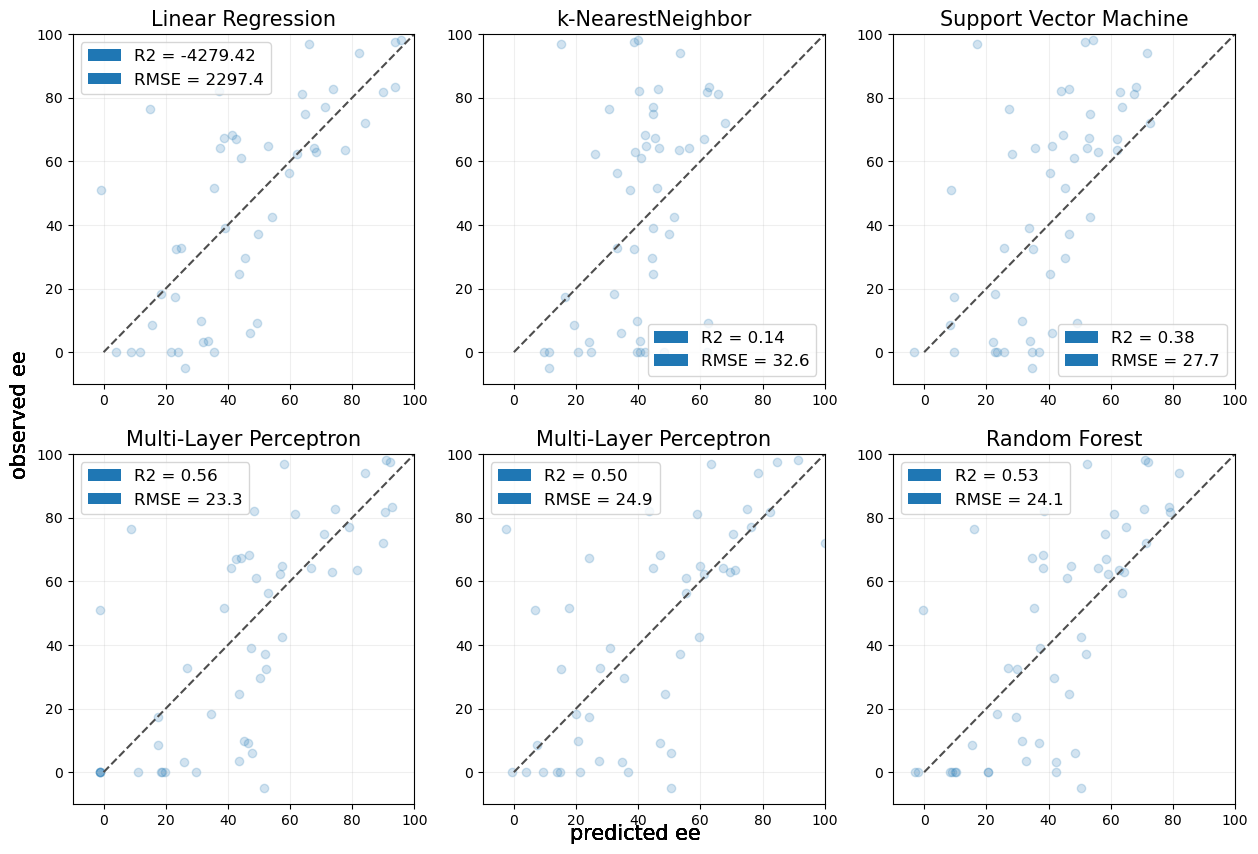

In [8]:
preds, r2_values, rmse_values  = ModelFits.fit_models(X_train, y_train, X_test, y_test, models)


ModelFits.plot_models(preds,
                  r2_values,
                  rmse_values,
                  y_test)

## Try UniMolRepr peptide and one-hot solvent

LinearRegression()
r2 scores: -1410644111.7333205
rmse score: 1268597.8792499606
KNeighborsRegressor(n_neighbors=7)
r2 scores: 0.5827202874871178
rmse score: 21.818700754717423
LinearSVR()
r2 scores: 0.43019879336237
rmse score: 25.496286638397113
MLPRegressor(hidden_layer_sizes=5, max_iter=100000, random_state=42,
             solver='lbfgs')


/home/troy/miniconda3/envs/unimol-tool/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


r2 scores: 0.6208873244342036
rmse score: 20.79693829742188
MLPRegressor(hidden_layer_sizes=100, max_iter=100000, random_state=42,
             solver='lbfgs')
r2 scores: 0.5806075574068511
rmse score: 21.873866178254843
RandomForestRegressor(n_estimators=500, random_state=42)
r2 scores: 0.6066903785913426
rmse score: 21.18275952534447
Done fitting models


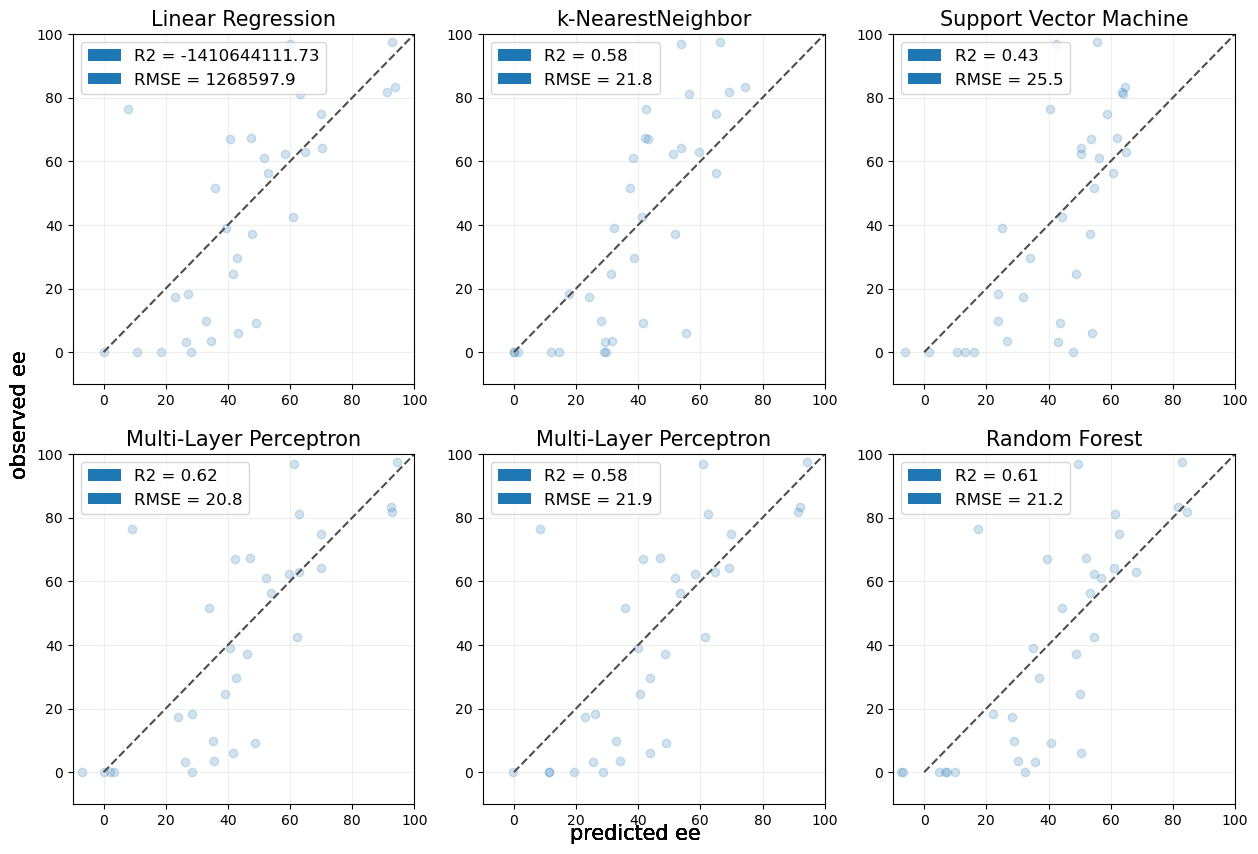

In [10]:
fea_df = pd.concat([unimol_repr,sol_oh], axis=1)

X = fea_df
y = np.array(label_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preds, r2_values, rmse_values  = ModelFits.fit_models(X_train, y_train, X_test, y_test, models)


ModelFits.plot_models(preds,
                  r2_values,
                  rmse_values,
                  y_test)